<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 振動分配関数


## 振動分配関数の温度依存性

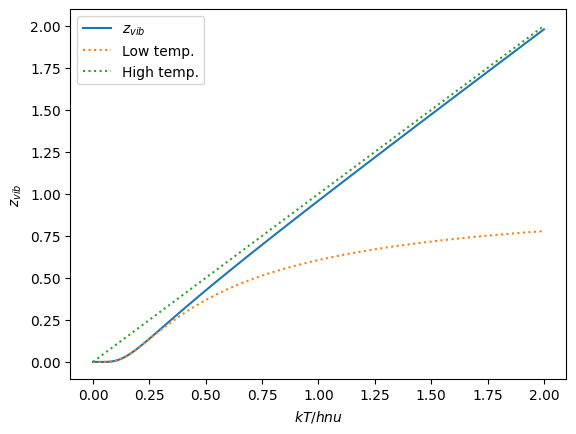

In [25]:
# assume h nu/k == 1

import numpy as np
import matplotlib.pyplot as plt


def A(T):
    return np.exp(-1/T)

def zvib(T):
    return A(T)**0.5 / (1-A(T))

def zlo(T):
    return A(T)**0.5

def zhi(T):
    return T

Tseq = np.linspace(0.0001, 2, 100)

plt.plot(Tseq, zvib(Tseq), label="$z_{vib}$")
plt.plot(Tseq, zlo(Tseq), ":", label="Low temp.")
plt.plot(Tseq, zhi(Tseq), ":", label="High temp.")
plt.xlabel("$kT/h nu$")
plt.ylabel("$z_{vib}$")
plt.legend()


## 振動エネルギー

$$\bar\epsilon_\mathrm{vib}={\partial(-kT\ln z_\mathrm{vib}/T)\over \partial(1/T)}={kT^2\over z_\mathrm{vib}}{\partial z_\mathrm{vib}\over\partial T}$$


In [26]:
# 記号演算でe_vibを計算する

import sympy

T = sympy.Symbol("T")
A = sympy.exp(-1/T)
zvib = A**0.5/(1-A)
zlo = A**0.5
zhi = T

evib = T**2/zvib*sympy.diff(zvib, T)
elo = T**2/zlo*sympy.diff(zlo, T)
ehi = T**2/zhi*sympy.diff(zhi, T)
evib, elo, ehi

(T**2*(1 - exp(-1/T))*(0.5*exp(-1/T)**0.5/(T**2*(1 - exp(-1/T))) + exp(-1/T)**0.5*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))/exp(-1/T)**0.5,
 0.500000000000000,
 T)

<lambdifygenerated-15>:2: RuntimeWarning: divide by zero encountered in power
  return T**2*(1 - exp(-1/T))*(0.5*sqrt(exp(-1/T))/(T**2*(1 - exp(-1/T))) + sqrt(exp(-1/T))*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))*exp(-1/T)**(-0.5)
<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in multiply
  return T**2*(1 - exp(-1/T))*(0.5*sqrt(exp(-1/T))/(T**2*(1 - exp(-1/T))) + sqrt(exp(-1/T))*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))*exp(-1/T)**(-0.5)


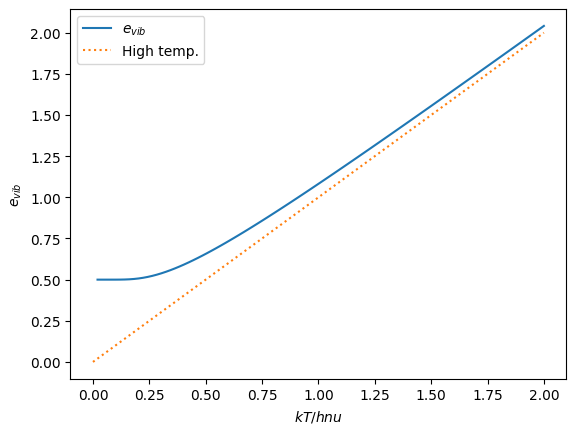

In [27]:
# 記号演算で作った関数をPythonの数値関数に変換

evib_ = sympy.lambdify(T, evib)
ehi_ = sympy.lambdify(T, ehi)

# プロット

plt.plot(Tseq, evib_(Tseq), label="$e_{vib}$")
plt.plot(Tseq, ehi_(Tseq), ":", label="High temp.")
plt.xlabel("$kT/h nu$")
plt.ylabel("$e_{vib}$")
plt.legend()


<lambdifygenerated-17>:2: RuntimeWarning: divide by zero encountered in power
  return T**2*(1 - exp(-1/T))*(-1.0*sqrt(exp(-1/T))/(T**3*(1 - exp(-1/T))) - 2*sqrt(exp(-1/T))*exp(-1/T)/(T**3*(1 - exp(-1/T))**2) + 0.25*sqrt(exp(-1/T))/(T**4*(1 - exp(-1/T))) + 2.0*sqrt(exp(-1/T))*exp(-1/T)/(T**4*(1 - exp(-1/T))**2) + 2*exp(-2/T)*sqrt(exp(-1/T))/(T**4*(1 - exp(-1/T))**3))*exp(-1/T)**(-0.5) + 2*T*(1 - exp(-1/T))*(0.5*sqrt(exp(-1/T))/(T**2*(1 - exp(-1/T))) + sqrt(exp(-1/T))*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))*exp(-1/T)**(-0.5) - 0.5*(1 - exp(-1/T))*(0.5*sqrt(exp(-1/T))/(T**2*(1 - exp(-1/T))) + sqrt(exp(-1/T))*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))*exp(-1/T)**(-0.5) - (0.5*sqrt(exp(-1/T))/(T**2*(1 - exp(-1/T))) + sqrt(exp(-1/T))*exp(-1/T)/(T**2*(1 - exp(-1/T))**2))*exp(-1/T)**(-0.5)*exp(-1/T)
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in multiply
  return T**2*(1 - exp(-1/T))*(-1.0*sqrt(exp(-1/T))/(T**3*(1 - exp(-1/T))) - 2*sqrt(exp(-1/T))*exp(-1/T)/(T**3*(1 - exp(-1/T)

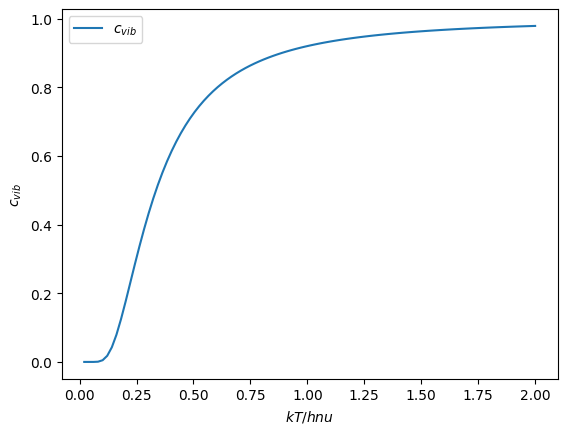

In [28]:
# 記号演算で比熱を計算する

cvib = sympy.diff(evib, T)

# 記号演算で作った関数をPythonの数値関数に変換

cvib_ = sympy.lambdify(T, cvib)

# プロット

plt.plot(Tseq, cvib_(Tseq), label="$c_{vib}$")
plt.xlabel("$kT/h nu$")
plt.ylabel("$c_{vib}$")
plt.legend()

